In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

In [3]:
# Here are three types of DS:
# Flic button
# Motion sensor
# Road surface

In [2]:
# Load and combine all three datasets
DS_FOLDER = "DS"

# FLIC BUTTON DATA 
flic_files = glob.glob(os.path.join(DS_FOLDER, 'flic_button_data_export_*.csv'))
flic_dfs = []
for file in flic_files:
    df = pd.read_csv(file)
    flic_dfs.append(df)
flic_df = pd.concat(flic_dfs)


# MOTION SENSOR DATA:
motion_files = glob.glob(os.path.join(DS_FOLDER, 'g_data_export_*.csv'))
motion_dfs = []
for file in motion_files:
    df = pd.read_csv(file)
    motion_dfs.append(df)
motion_df = pd.concat(motion_dfs)



# ROAD SURFACE DATA
road_files = glob.glob(os.path.join(DS_FOLDER, 'md30_export_*.csv'))
road_dfs = []
for file in road_files:
    df = pd.read_csv(file)
    road_dfs.append(df)
road_df = pd.concat(road_dfs)
print("Shape of FLic Button", flic_df.shape)
print("shape of motion", motion_df.shape)
print("Shape of road surface", road_df.shape)

Shape of FLic Button (890, 22)
shape of motion (26277, 22)
Shape of road surface (258260, 32)


<h3><center>Flic button DS<h3>


In [3]:
flic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 205
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               890 non-null    int64  
 1   ts               890 non-null    object 
 2   ruuvi            0 non-null      float64
 3   aplicom          890 non-null    object 
 4   companyid        0 non-null      float64
 5   address          890 non-null    object 
 6   rssi             890 non-null    int64  
 7   advdata          52 non-null     float64
 8   lat              890 non-null    float64
 9   lon              890 non-null    float64
 10  geom             890 non-null    object 
 11  temperature      0 non-null      float64
 12  accx             0 non-null      float64
 13  accy             0 non-null      float64
 14  accz             0 non-null      float64
 15  battvoltage      0 non-null      float64
 16  txpower          0 non-null      float64
 17  movcounter       0 no

In [4]:
# Drop all empty columns
flic_df = flic_df.dropna(axis=1, how='all')
flic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 205
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       890 non-null    int64  
 1   ts       890 non-null    object 
 2   aplicom  890 non-null    object 
 3   address  890 non-null    object 
 4   rssi     890 non-null    int64  
 5   advdata  52 non-null     float64
 6   lat      890 non-null    float64
 7   lon      890 non-null    float64
 8   geom     890 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 69.5+ KB


**aplicom**: Receiving telematics gateway<br>
**address**: MAC address<br>
**rssi**:Signal strength in dBm<br>
**lat/lon**: GPS coordinates<br>
**geom**:PostGIS geometry

In [5]:
flic_df.head()

,id,ts,aplicom,address,rssi,advdata,lat,lon,geom
0,18615183,2025-11-10 01:50:40.22+02,Aplicom A11 001,80E4DA7EC61B,-60,NaN,60.493152,22.288016,0101000020E610000088B9A46ABB4936407FFACF9A1F3F...
1,18615186,2025-11-10 01:50:42.122+02,Aplicom A11 001,80E4DA7EC61B,-63,NaN,60.493151,22.288017,0101000020E610000029B16B7BBB493640AE7E6C921F3F...
2,18615187,2025-11-10 01:50:44.1+02,Aplicom A11 001,80E4DA7EC61B,-76,NaN,60.493150,22.288017,0101000020E610000029B16B7BBB493640DE02098A1F3F...
3,18615189,2025-11-10 01:50:45.963+02,Aplicom A11 001,80E4DA7EC61B,-55,NaN,60.493148,22.288014,0101000020E610000047CA1649BB4936403D0B42791F3F...
4,18615192,2025-11-10 01:50:48.722+02,Aplicom A11 001,80E4DA7EC61B,-54,NaN,60.493146,22.288012,0101000020E610000005DB8827BB4936409D137B681F3F...


In [6]:
# Convert timestamp to datetime
flic_df['ts'] = pd.to_datetime(flic_df['ts'], format='ISO8601', errors='coerce')
flic_df.head()

,id,ts,aplicom,address,rssi,advdata,lat,lon,geom
0,18615183,2025-11-10 01:50:40.220000+02:00,Aplicom A11 001,80E4DA7EC61B,-60,NaN,60.493152,22.288016,0101000020E610000088B9A46ABB4936407FFACF9A1F3F...
1,18615186,2025-11-10 01:50:42.122000+02:00,Aplicom A11 001,80E4DA7EC61B,-63,NaN,60.493151,22.288017,0101000020E610000029B16B7BBB493640AE7E6C921F3F...
2,18615187,2025-11-10 01:50:44.100000+02:00,Aplicom A11 001,80E4DA7EC61B,-76,NaN,60.493150,22.288017,0101000020E610000029B16B7BBB493640DE02098A1F3F...
3,18615189,2025-11-10 01:50:45.963000+02:00,Aplicom A11 001,80E4DA7EC61B,-55,NaN,60.493148,22.288014,0101000020E610000047CA1649BB4936403D0B42791F3F...
4,18615192,2025-11-10 01:50:48.722000+02:00,Aplicom A11 001,80E4DA7EC61B,-54,NaN,60.493146,22.288012,0101000020E610000005DB8827BB4936409D137B681F3F...


In [7]:
# Find the time range 
flic_df['ts'].min(), flic_df['ts'].max()

(Timestamp('2025-11-10 01:50:40.220000+0200', tz='UTC+02:00'),
 Timestamp('2026-01-09 22:30:19.288000+0200', tz='UTC+02:00'))

In [8]:
# Find where the Flic button was pressed
flic_df['location'] = flic_df['lat'].round(2).astype(str) + ', ' + flic_df['lon'].round(2).astype(str)
hotspots = flic_df['location'].value_counts().head(15)
print("TOP LOCATIONS:\n")
for i, (loc, count) in enumerate(hotspots.items(), 1):
    print(f"   {i}. ({loc}): {count} presses")

TOP LOCATIONS:

   1. (60.49, 22.17): 42 presses
   2. (60.2, 23.11): 37 presses
   3. (60.24, 23.55): 34 presses
   4. (60.24, 23.58): 33 presses
   5. (60.38, 23.1): 32 presses
   6. (60.24, 23.56): 32 presses
   7. (60.24, 23.54): 31 presses
   8. (59.82, 22.96): 30 presses
   9. (60.42, 22.73): 30 presses
   10. (60.25, 23.52): 30 presses
   11. (60.39, 23.16): 27 presses
   12. (60.24, 23.57): 26 presses
   13. (60.22, 23.62): 23 presses
   14. (60.24, 23.53): 20 presses
   15. (60.39, 23.09): 19 presses


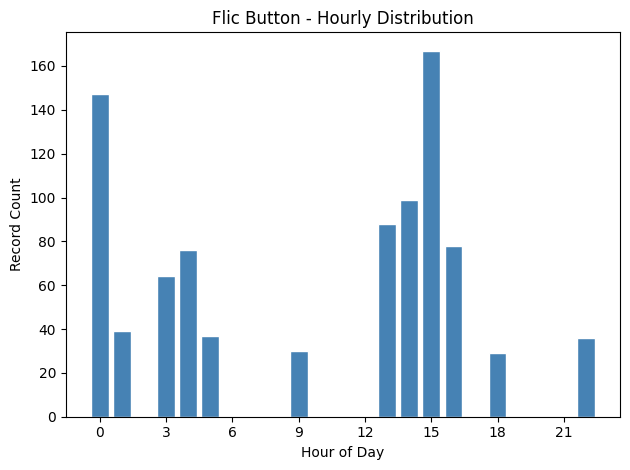

In [ ]:
flic_hourly = flic_df['ts'].dt.hour.value_counts().sort_index()
plt.bar(flic_hourly.index, flic_hourly.values, color='steelblue', edgecolor='white')
plt.xlabel('Hour of Day')
plt.ylabel('Record Count')
plt.title('Flic Button Hourly Distribution')
plt.xticks(range(0, 24, 3))
plt.tight_layout()
plt.show()

In [10]:
peak_hour = flic_hourly.idxmax()
low_hour= flic_hourly.idxmin()
print(f"Peak hour: {peak_hour:02d}:00 ({flic_hourly[peak_hour]} presses)")
print(f"Lowest hour: {low_hour:02d}:00 ({flic_hourly[low_hour]} presses)")

Peak hour: 15:00 (167 presses)
Lowest hour: 18:00 (29 presses)


In [11]:
# Find the coverage area using lat/lon
lat_km = (flic_df['lat'].max()-flic_df['lat'].min())*111
lon_km = (flic_df['lon'].max()-flic_df['lon'].min())*55  
diagonal = np.sqrt(lat_km**2 + lon_km**2)

print(f"Coverage is around: {diagonal:.0f} KM")

Coverage is around: 118 KM


<h3><center> Motion,  temperature and humidity DS<h3>

In [12]:
motion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26277 entries, 0 to 4489
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               26277 non-null  int64  
 1   ts               26277 non-null  object 
 2   ruuvi            0 non-null      float64
 3   aplicom          26277 non-null  object 
 4   companyid        26277 non-null  int64  
 5   address          26277 non-null  object 
 6   rssi             26277 non-null  int64  
 7   advdata          26277 non-null  object 
 8   lat              26277 non-null  float64
 9   lon              26277 non-null  float64
 10  geom             26277 non-null  object 
 11  temperature      26277 non-null  float64
 12  accx             26277 non-null  int64  
 13  accy             26277 non-null  int64  
 14  accz             26277 non-null  int64  
 15  battvoltage      26277 non-null  float64
 16  txpower          26277 non-null  int64  
 17  movcounter       2

In [13]:
# here only one column is empty.
motion_df = motion_df.dropna(axis=1, how='all')
motion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26277 entries, 0 to 4489
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               26277 non-null  int64  
 1   ts               26277 non-null  object 
 2   aplicom          26277 non-null  object 
 3   companyid        26277 non-null  int64  
 4   address          26277 non-null  object 
 5   rssi             26277 non-null  int64  
 6   advdata          26277 non-null  object 
 7   lat              26277 non-null  float64
 8   lon              26277 non-null  float64
 9   geom             26277 non-null  object 
 10  temperature      26277 non-null  float64
 11  accx             26277 non-null  int64  
 12  accy             26277 non-null  int64  
 13  accz             26277 non-null  int64  
 14  battvoltage      26277 non-null  float64
 15  txpower          26277 non-null  int64  
 16  movcounter       26277 non-null  int64  
 17  measseqnum       2

**accx, accy, accz**: Raw accelerometer readings<br>
**battvoltage**: Battery voltage<br>
**txpower**: Transmission power<br>
**movcounter**: Increments when motion detected

In [14]:
motion_df['ts'] = pd.to_datetime(motion_df['ts'], format='ISO8601',errors='coerce')
motion_df.head()

,id,ts,aplicom,companyid,address,rssi,advdata,lat,lon,geom,...,accx,accy,accz,battvoltage,txpower,movcounter,measseqnum,calibrated_accx,calibrated_accy,calibrated_accz
0,18615026,2025-11-10 01:48:05.187000+02:00,Aplicom A11 001,499,E78E9C0B06E0,-86,0201061bff9904050512ffffffff02a4fd0cfffc7e9655...,60.493215,22.287981,0101000020E61000008FDE701FB9493640C5724BAB213F...,...,676,-756,-4,2.612,4,85,7383,-36.640755,3.639896,2.106111
1,18615027,2025-11-10 01:48:07.150000+02:00,Aplicom A11 001,499,E78E9C0B06E0,-79,0201061bff9904050511ffffffff02a4fd14fff87e9655...,60.493212,22.287982,0101000020E610000030D63730B949364054FF2092213F...,...,676,-748,-8,2.612,4,85,7384,-41.093213,8.394061,8.235836
2,18615028,2025-11-10 01:48:09.034000+02:00,Aplicom A11 001,499,E198DBE2771E,-85,0201061bff9904050530ffffffff03dcfe8cfff074f668...,60.493206,22.287980,0101000020E6100000EFE6A90EB94936407218CC5F213F...,...,988,-372,-16,2.535,4,104,7184,-4.469715,42.277061,-1.047282
3,18615033,2025-11-10 01:48:20.720000+02:00,Aplicom A11 001,499,E78E9C0B06E0,-81,0201061bff9904050511ffffffff02a0fd0cfffc7e9655...,60.493177,22.288002,0101000020E6100000BE2EC37FBA493640D811876C203F...,...,672,-756,-4,2.612,4,85,7389,-36.175016,0.671586,4.746608
4,18615034,2025-11-10 01:48:23.017000+02:00,Aplicom A11 001,499,E198DBE2771E,-84,0201061bff9904050530ffffffff03dcfe94ffec74f668...,60.493175,22.288007,0101000020E6100000E204A6D3BA493640371AC05B203F...,...,988,-364,-20,2.535,4,104,7189,-6.271060,50.472670,2.049030


In [15]:
# Let's check the time range 
motion_df['ts'].min(), motion_df['ts'].max() 
# the same time range like button DS

(Timestamp('2025-11-10 01:48:05.187000+0200', tz='UTC+02:00'),
 Timestamp('2026-01-09 22:39:05.840000+0200', tz='UTC+02:00'))

In [16]:
print("Min temperature: ", motion_df['temperature'].min())
print("Max temperature", motion_df['temperature'].max())

# the max value for temperature is not possible.
# 326 is hotter than oven. 

Min temperature:  0.15
Max temperature 326.235


In [17]:
motion_df['temperature'].describe()

count    26277.000000
mean       211.198349
std        150.138414
min          0.150000
25%          7.680000
50%        316.445000
75%        323.440000
max        326.235000
Name: temperature, dtype: float64

<h3><center>Road Surface Sensors<h3>

In [18]:
road_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258260 entries, 0 to 108475
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       258260 non-null  int64  
 1   ts                       258260 non-null  object 
 2   aplicom                  258260 non-null  object 
 3   lat                      258260 non-null  float64
 4   lon                      258260 non-null  float64
 5   hexdata                  258260 non-null  object 
 6   message_start            258260 non-null  object 
 7   sender_id                258260 non-null  int64  
 8   receiver_id              258260 non-null  int64  
 9   message_id               258260 non-null  int64  
 10  message_number           258260 non-null  int64  
 11  data_length              258260 non-null  int64  
 12  interface_version        258260 non-null  int64  
 13  error_code               258260 non-null  int64  
 14  data_anal

**en15518_surface_state**:European standard road state<br>
**surface_state**:Internal surface state code<br>
**water_layer_thickness**:Water depth on road<br>

In [19]:
road_df['ts'] = pd.to_datetime(road_df['ts'], format='ISO8601',errors='coerce')
road_df.head()

,id,ts,aplicom,lat,lon,hexdata,message_start,sender_id,receiver_id,message_id,...,surface_state,en15518_surface_state,grip,water_layer_thickness,ice_layer_thickness,snow_layer_thickness,unit_status_info,unit_error_bits,crc,geom
0,43509630,2025-11-10 01:50:38.942000+02:00,Aplicom A11 001,60.493152,22.288015,0xAB 0x1 0x0 0x20 0x3 0x36 0x0 0x44 0x0 0x90 0...,ab,1,0,20,...,3,3,0.697317,0.340409,0.0,0.0,9,8,8862,0101000020E6100000E8C1DD59BB4936407FFACF9A1F3F...
1,43509631,2025-11-10 01:50:38.945000+02:00,Aplicom A11 001,60.493152,22.288015,0xAB 0x1 0x0 0x20 0x4 0x36 0x0 0x44 0x0 0xA3 0...,ab,1,0,20,...,3,3,0.697985,0.337601,0.0,0.0,9,8,5d4b,0101000020E6100000E8C1DD59BB4936407FFACF9A1F3F...
2,43509632,2025-11-10 01:50:38.947000+02:00,Aplicom A11 001,60.493152,22.288015,0xAB 0x1 0x0 0x20 0x5 0x36 0x0 0x44 0x0 0xB7 0...,ab,1,0,20,...,3,3,0.695922,0.346411,0.0,0.0,9,8,c167,0101000020E6100000E8C1DD59BB4936407FFACF9A1F3F...
3,43509633,2025-11-10 01:50:38.949000+02:00,Aplicom A11 001,60.493152,22.288015,0xAB 0x1 0x0 0x20 0x6 0x36 0x0 0x44 0x0 0xCB 0...,ab,1,0,20,...,3,3,0.682641,0.413942,0.0,0.0,9,8,2af1,0101000020E6100000E8C1DD59BB4936407FFACF9A1F3F...
4,43509634,2025-11-10 01:50:38.950000+02:00,Aplicom A11 001,60.493152,22.288015,0xAB 0x1 0x0 0x20 0x7 0x36 0x0 0x44 0x0 0xDF 0...,ab,1,0,20,...,3,3,0.683389,0.409591,0.0,0.0,9,8,7647,0101000020E6100000E8C1DD59BB4936407FFACF9A1F3F...
